In [1]:
# ignore this
%load_ext music21.ipython21
%matplotlib inline

User’s Guide, Chapter 22: Graphing
==================================

There are a number of ways to visualize notes, scores, and measures in music21.

## Visualizing Streams in Plots

While the :meth:`~music21.base.Music21Object.show` method provides common
musical views of a Stream, a visual plot a Stream's elements is very 
useful. Sometimes called a piano roll, we might graph the pitch of a 
Note over its position in a Measure (or offset if no Measures are 
defined). The :meth:`~music21.stream.Stream.plot` method permits us to 
create a plot of any Stream or Stream subclass (note that the additional
package matplotlib needs to be installed to run graphs, see :ref:`installAdditional`
for more information). There are a large variety 
of plots: see :ref:`moduleGraph` for a complete list. There are a number 
of ways to get the desired plot; one, as demonstrated below, is to provide 
the name of the plot as a string. We can also add a keyword argument for 
the title of the plot (and configure many other features).

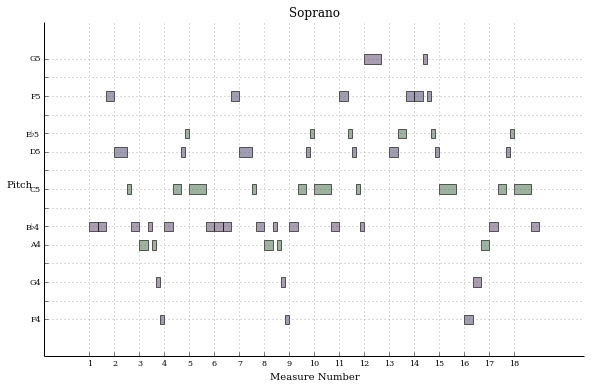

In [2]:
from music21 import *
sBach = corpus.parse('bach/bwv57.8')
sBach.getElementById('Soprano').plot('PlotHorizontalBarPitchSpaceOffset', title='Soprano')